In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 40.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoPackage
gdf = gpd.read_file("data_set_fire_clean.gpkg")

# Dictionnaire pour renommer les colonnes
rename_dict = {
    'climat_1': 'tmin_s1',
    'climat_2': 'tmin_s2',
    'climat_3': 'tmin_s3',
    'climat_4': 'tmin_s4',
    'climat_5': 'tmax_s1',
    'climat_6': 'tmax_s2',
    'climat_7': 'tmax_s3',
    'climat_8': 'tmax_s4',
    'climat_9': 'precip_s1',
    'climat_10': 'precip_s2',
    'climat_11': 'precip_s3',
    'climat_12': 'precip_s4'
}

# Renommer les colonnes
gdf = gdf.rename(columns=rename_dict)

# Afficher les nouveaux noms pour vérification
print(gdf.columns)

# --- Sauvegarder le fichier modifié ---
gdf.to_file("data_set_fire_clean_rename.gpkg", driver="GPKG")
print("Fichier sauvegardé sous .gpkg")


Index(['fire', 'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4', 'tmax_s1',
       'tmax_s2', 'tmax_s3', 'tmax_s4', 'precip_s1', 'precip_s2', 'precip_s3',
       'precip_s4', 'ndvi1', 'elevation1', 'aspect1', 'fid_3', 'ID', 'DB_ID',
       'FAO90', 'WRB4', 'SHARE', 'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA',
       'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N',
       'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'fid_2', 'ID_2',
       'GRIDCODE', 'AREA', 'LCCCODE', 'source', 'geometry'],
      dtype='object')
Fichier sauvegardé sous .gpkg


Colonnes disponibles :
Index(['fire', 'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4', 'tmax_s1',
       'tmax_s2', 'tmax_s3', 'tmax_s4', 'precip_s1', 'precip_s2', 'precip_s3',
       'precip_s4', 'ndvi1', 'elevation1', 'aspect1', 'fid_3', 'ID', 'DB_ID',
       'FAO90', 'WRB4', 'SHARE', 'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA',
       'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N',
       'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'fid_2', 'ID_2',
       'GRIDCODE', 'AREA', 'LCCCODE', 'source', 'geometry'],
      dtype='object')
tmin_s1: 0 outliers détectés


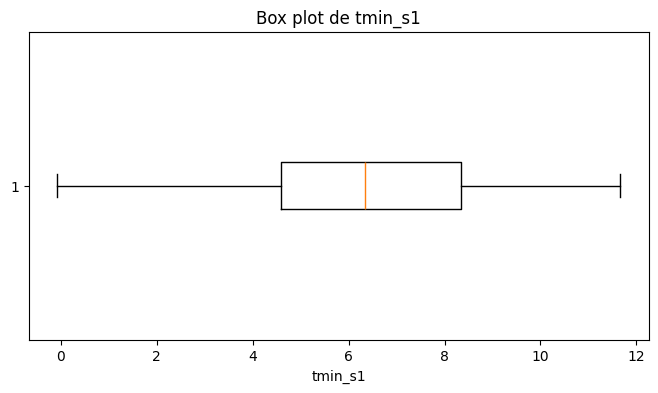

tmin_s2: 524 outliers détectés


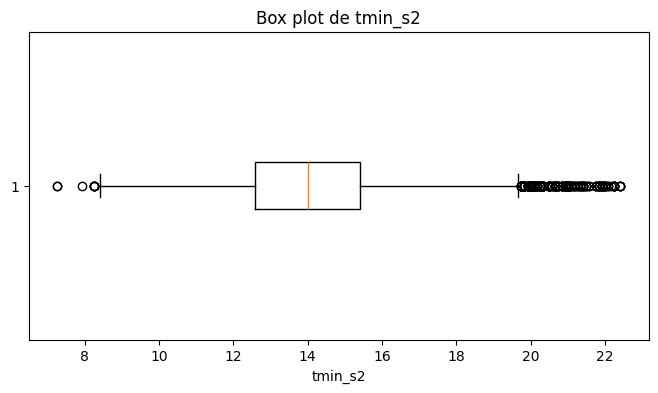

tmin_s3: 500 outliers détectés


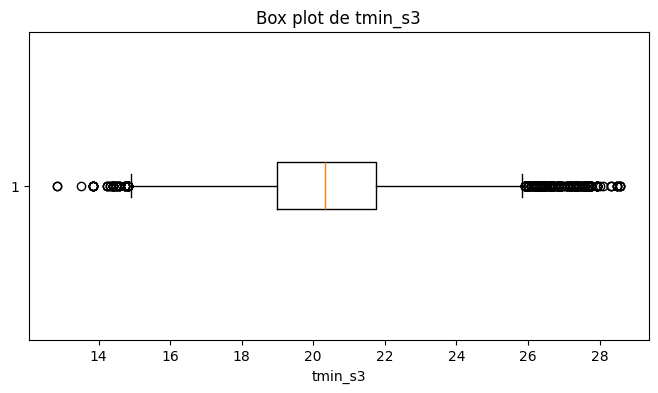

tmin_s4: 0 outliers détectés


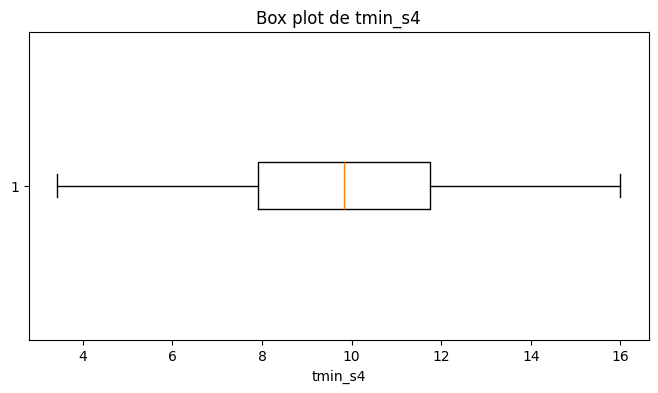

tmax_s1: 11 outliers détectés


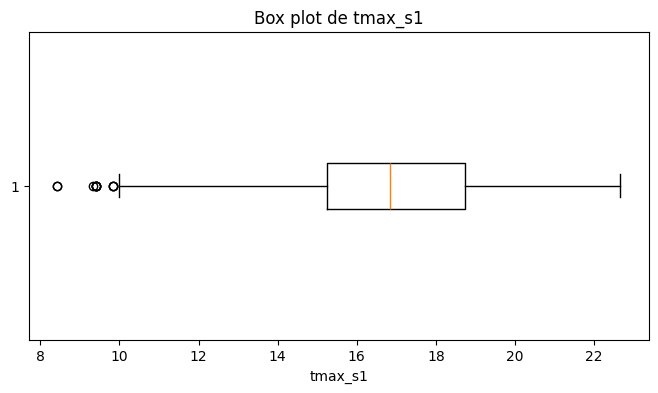

tmax_s2: 671 outliers détectés


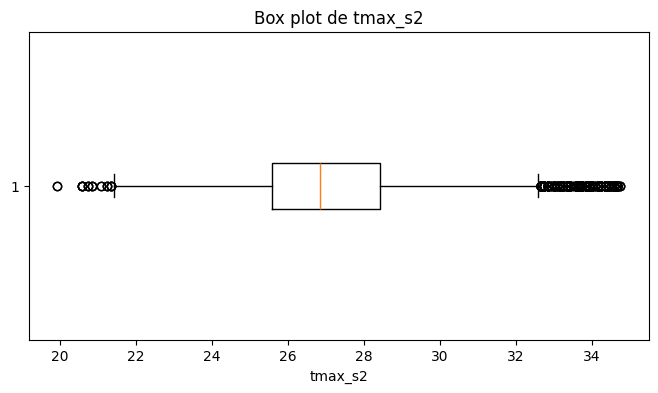

tmax_s3: 636 outliers détectés


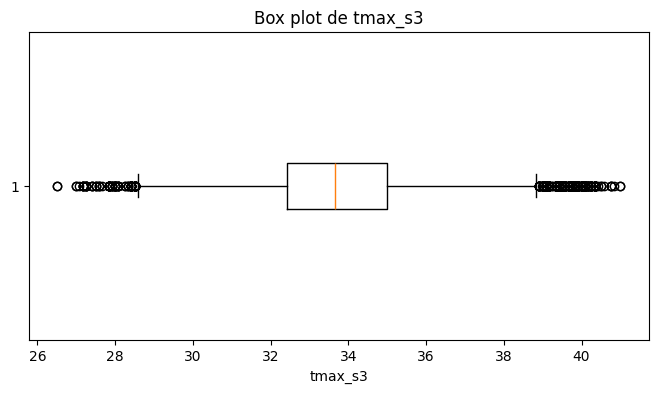

tmax_s4: 2 outliers détectés


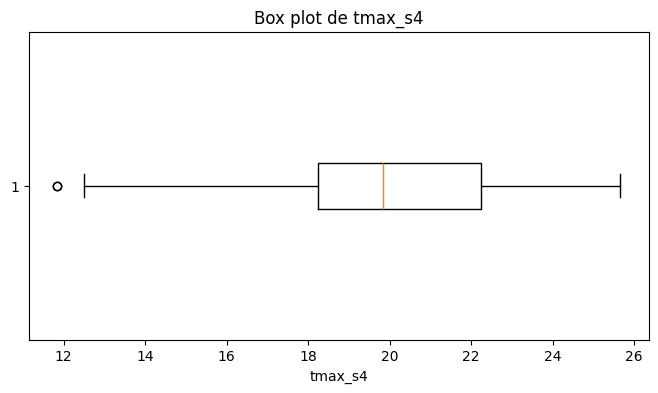

precip_s1: 442 outliers détectés


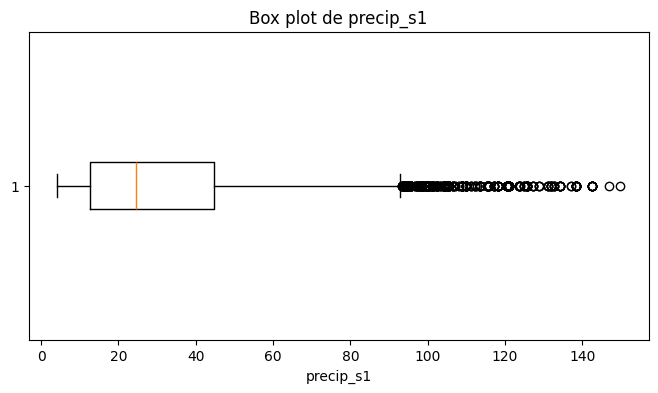

precip_s2: 14 outliers détectés


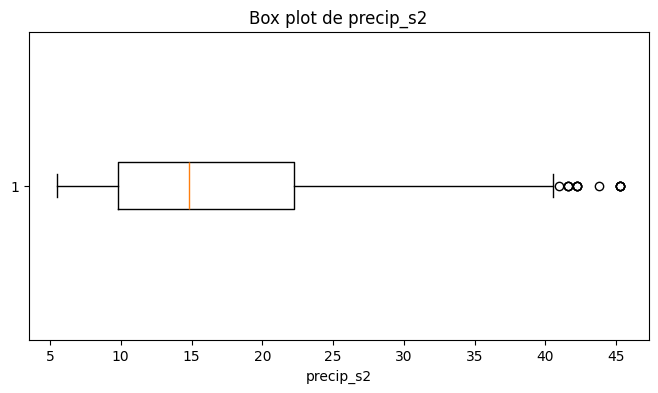

precip_s3: 132 outliers détectés


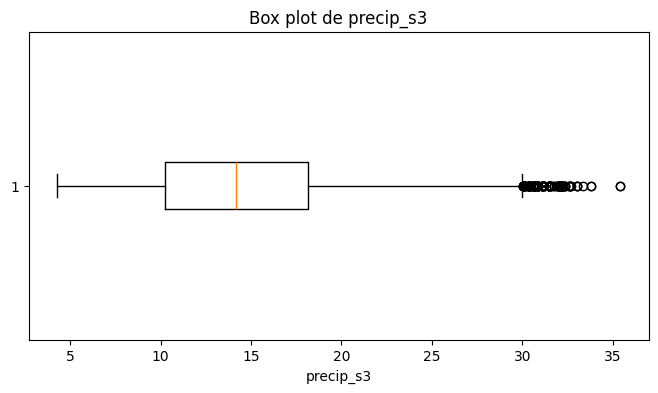

precip_s4: 476 outliers détectés


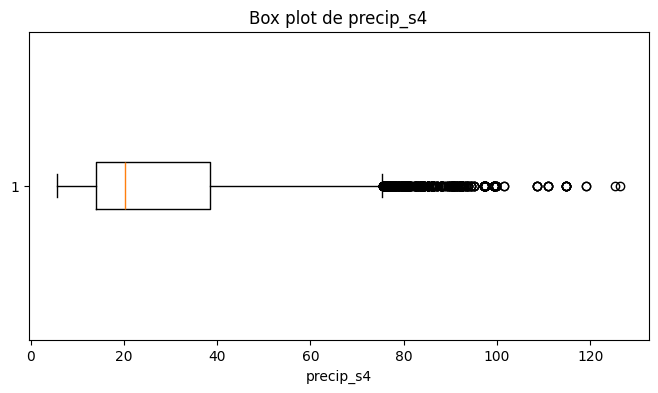

Fichier sauvegardé sous data_set_fire_outliers.gpkg


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoPackage déjà renommé
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_clean_rename.gpkg")
print("Colonnes disponibles :")
print(gdf.columns)

# Colonnes à analyser
colonnes = [
    'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4',
    'tmax_s1', 'tmax_s2', 'tmax_s3', 'tmax_s4',
    'precip_s1', 'precip_s2', 'precip_s3', 'precip_s4'
]

# Identifier les outliers et créer une colonne booléenne pour chaque attribut
for col in colonnes:
    Q1 = gdf[col].quantile(0.25)
    Q3 = gdf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nouvelle colonne True/False pour les outliers
    gdf[f'{col}_outlier'] = ((gdf[col] < lower_bound) | (gdf[col] > upper_bound))
    print(f"{col}: {gdf[f'{col}_outlier'].sum()} outliers détectés")

    # Box plot pour chaque colonne
    plt.figure(figsize=(8, 4))
    plt.boxplot(gdf[col], vert=False)
    plt.title(f"Box plot de {col}")
    plt.xlabel(col)
    plt.show()

# Sauvegarder le fichier modifié avec les colonnes outliers
gdf.to_file("data_set_fire_outliers.gpkg", driver="GPKG")
print("Fichier sauvegardé sous data_set_fire_outliers.gpkg")


In [ ]:
import geopandas as gpd
import numpy as np

# Charger le fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_clean_rename.gpkg")

# Colonnes à transformer
per_cols = ["precip_s1", "precip_s2", "precip_s3", "precip_s4"]

# Appliquer la transformation log10
for col in per_cols:
    # Remplacer (ou ignorer) les valeurs ≤ 0 pour éviter erreur log10
    gdf[col] = gdf[col].replace(0, np.nan)
    gdf[f"{col}_log10"] = np.log10(gdf[col])

    print(f"Transformation log10 appliquée sur {col}")

# Sauvegarder le fichier modifié
gdf.to_file("data_set_fire_perc_log10.gpkg", driver="GPKG")
print("Fichier sauvegardé sous data_set_fire_log10.gpkg")


Transformation log10 appliquée sur precip_s1
Transformation log10 appliquée sur precip_s2
Transformation log10 appliquée sur precip_s3
Transformation log10 appliquée sur precip_s4
Fichier sauvegardé sous data_set_fire_log10.gpkg


Colonnes disponibles :
Index(['fire', 'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4', 'tmax_s1',
       'tmax_s2', 'tmax_s3', 'tmax_s4', 'ndvi1', 'elevation1', 'aspect1',
       'fid_3', 'ID', 'DB_ID', 'FAO90', 'WRB4', 'SHARE', 'COARSE', 'SAND',
       'SILT', 'CLAY', 'USDA', 'SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON',
       'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF',
       'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND',
       'fid_2', 'ID_2', 'GRIDCODE', 'AREA', 'LCCCODE', 'source',
       'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10',
       'precip_s4_log10', 'geometry'],
      dtype='object')
tmin_s1: 0 outliers détectés


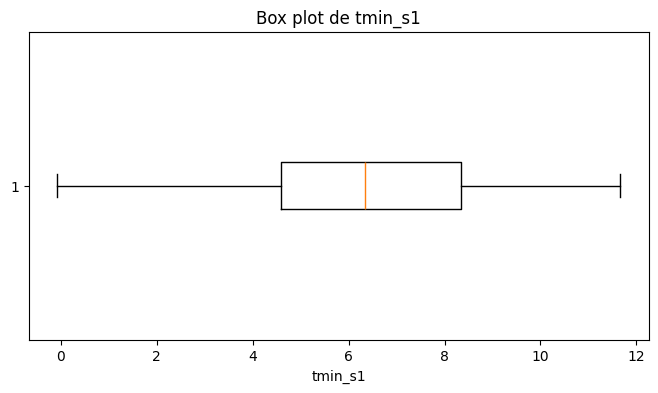

tmin_s2: 524 outliers détectés


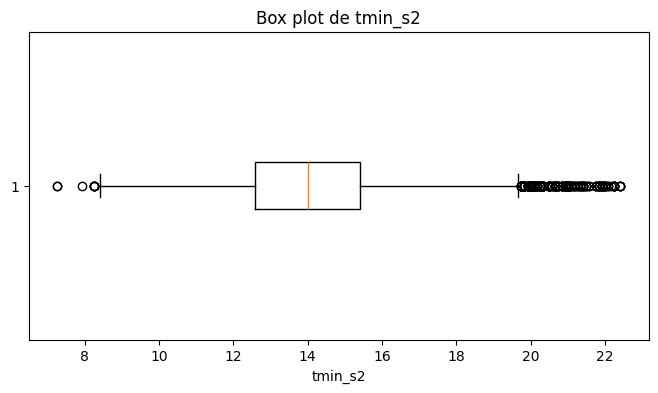

tmin_s3: 500 outliers détectés


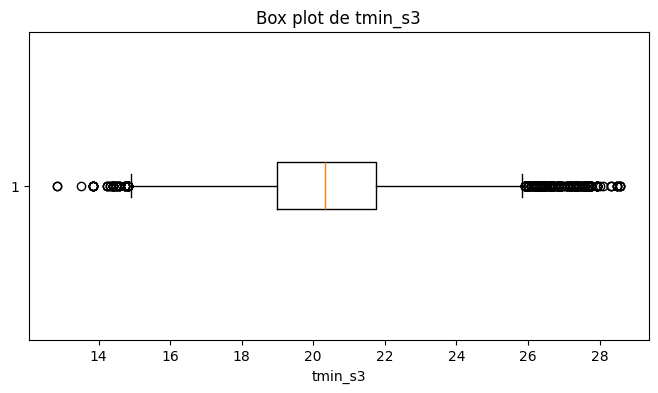

tmin_s4: 0 outliers détectés


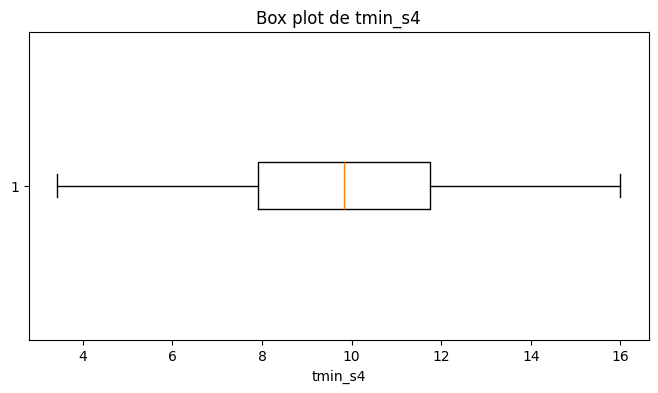

tmax_s1: 11 outliers détectés


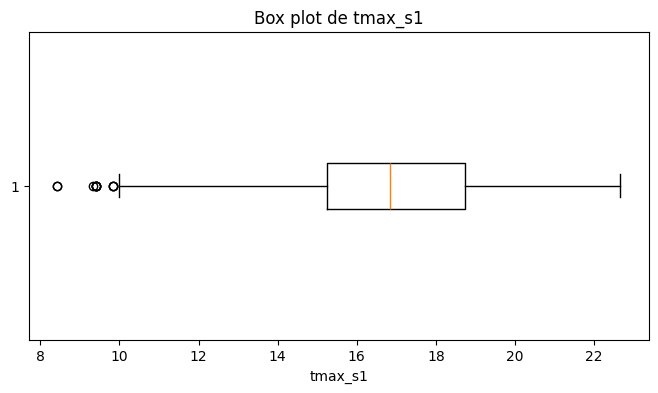

tmax_s2: 671 outliers détectés


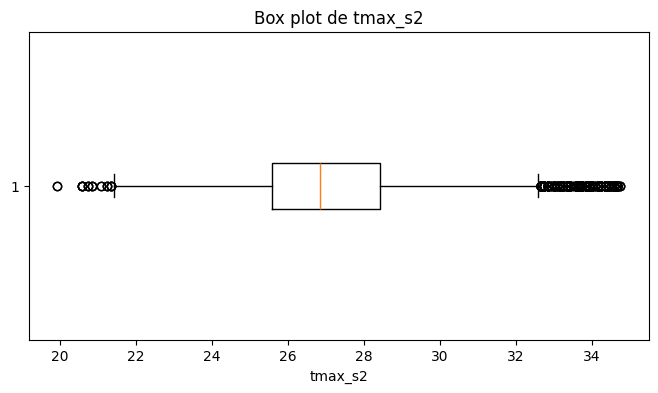

tmax_s3: 636 outliers détectés


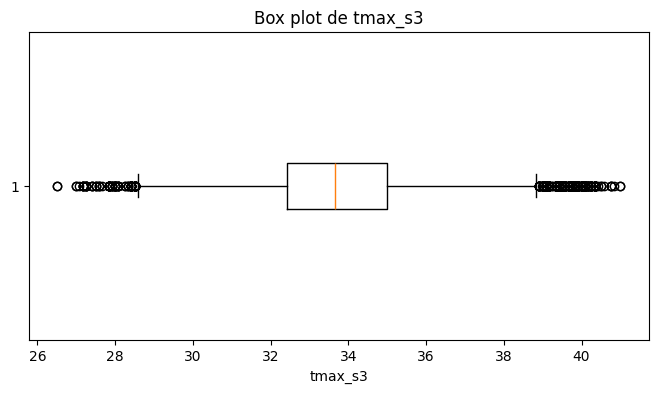

tmax_s4: 2 outliers détectés


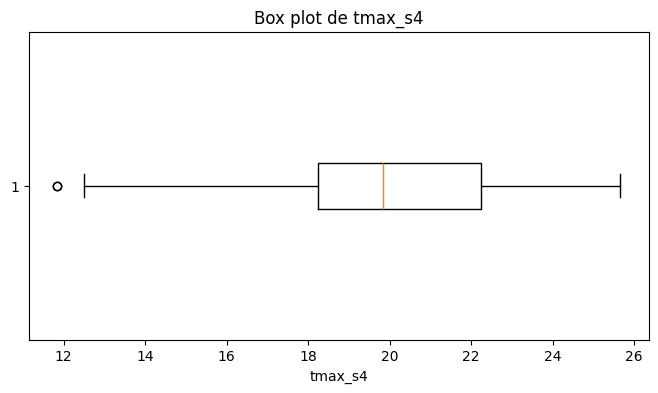

precip_s1_log10: 0 outliers détectés


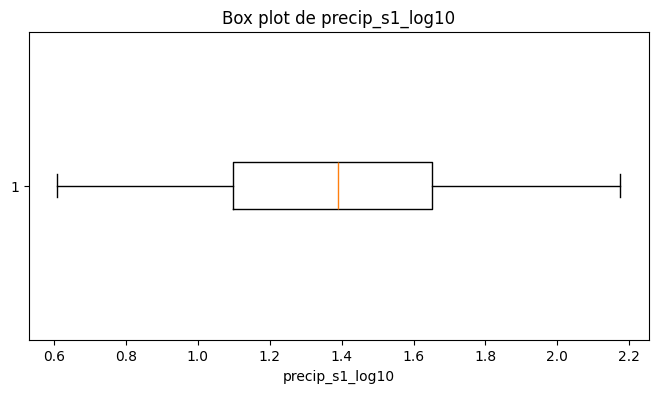

precip_s2_log10: 0 outliers détectés


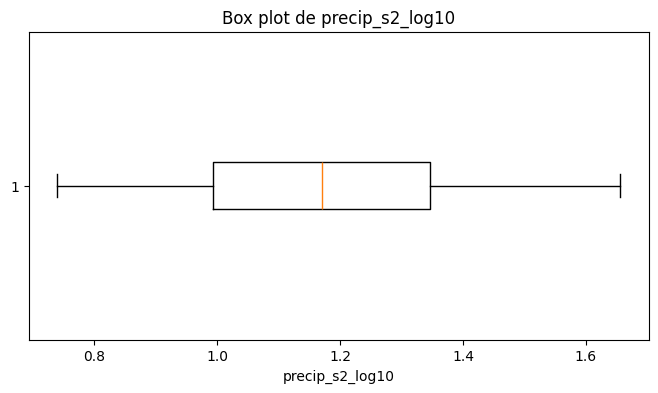

precip_s3_log10: 11 outliers détectés


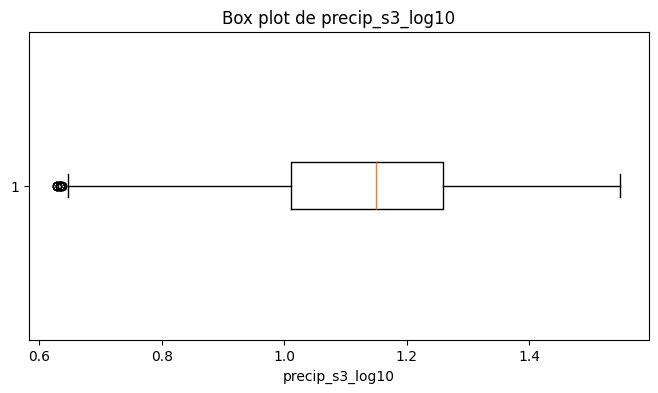

precip_s4_log10: 0 outliers détectés


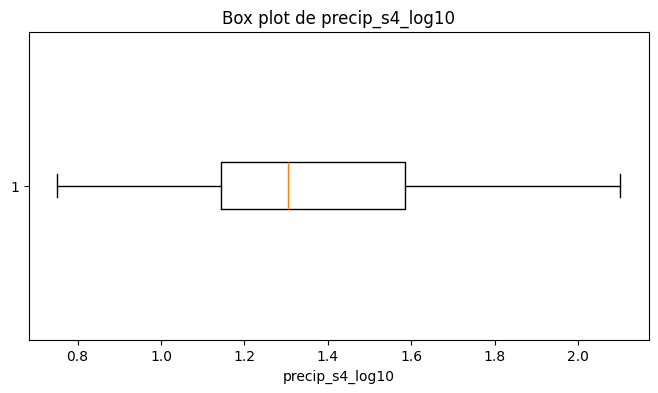

Fichier sauvegardé sous data_set_fire_outliers.gpkg


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoPackage déjà renommé
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg")
print("Colonnes disponibles :")
print(gdf.columns)

# Colonnes à analyser
colonnes = [
    'tmin_s1', 'tmin_s2', 'tmin_s3', 'tmin_s4',
    'tmax_s1', 'tmax_s2', 'tmax_s3', 'tmax_s4',
    'precip_s1_log10', 'precip_s2_log10', 'precip_s3_log10', 'precip_s4_log10'
]

# Identifier les outliers et créer une colonne booléenne pour chaque attribut
for col in colonnes:
    Q1 = gdf[col].quantile(0.25)
    Q3 = gdf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Nouvelle colonne True/False pour les outliers
    gdf[f'{col}_outlier'] = ((gdf[col] < lower_bound) | (gdf[col] > upper_bound))
    print(f"{col}: {gdf[f'{col}_outlier'].sum()} outliers détectés")

    # Box plot pour chaque colonne
    plt.figure(figsize=(8, 4))
    plt.boxplot(gdf[col], vert=False)
    plt.title(f"Box plot de {col}")
    plt.xlabel(col)
    plt.show()

# Sauvegarder le fichier modifié avec les colonnes outliers
gdf.to_file("data_set_fire_outliers.gpkg", driver="GPKG")
print("Fichier sauvegardé sous data_set_fire_outliers.gpkg")


In [ ]:
import geopandas as gpd

# Charger le fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg")

# Suppression de plusieurs colonnes
gdf = gdf.drop(columns=["precip_s1", "precip_s2", "precip_s3", "precip_s4"])

# Sauvegarder le fichier
gdf.to_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg", driver="GPKG")

print("Colonnes supprimées et fichier sauvegardé.")


Colonnes supprimées et fichier sauvegardé.


Nombre d'outliers dans 'elevation1' : 1
      elevation1                  geometry
5348      2152.0  POINT (6.65684 35.32733)


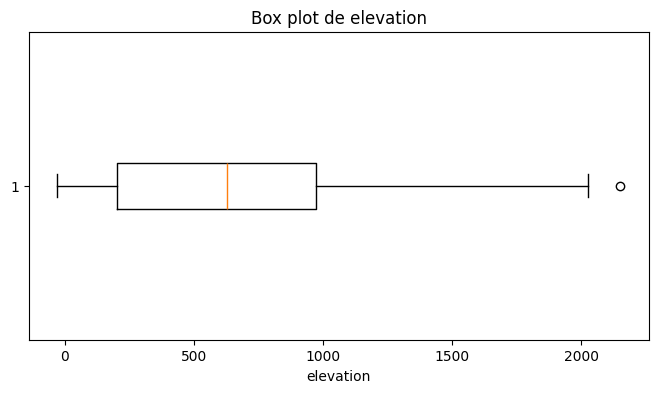

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger ton fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg")

# Colonne à analyser
col = "elevation1"

# ---- Calcul des outliers (méthode IQR) ----
Q1 = gdf[col].quantile(0.25)
Q3 = gdf[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extraction des outliers
outliers = gdf[(gdf[col] < lower_bound) | (gdf[col] > upper_bound)]

# Affichage du résultat
print(f"Nombre d'outliers dans '{col}' : {len(outliers)}")
print(outliers[[col, "geometry"]].head())   # premières lignes des outliers

# ---- Boxplot ----
plt.figure(figsize=(8, 4))
plt.boxplot(gdf[col], vert=False)
plt.title("Box plot de elevation")
plt.xlabel("elevation")
plt.show()


Nombre d'outliers dans 'aspect1' : 0
Empty GeoDataFrame
Columns: [aspect1, geometry]
Index: []


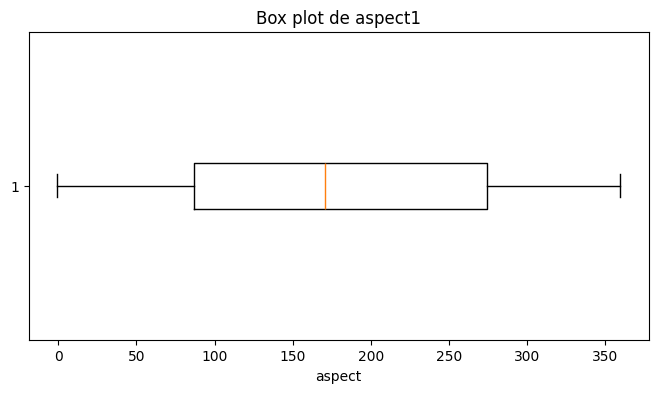

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger ton fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg")

# Colonne à analyser
col = "aspect1"

# ---- Calcul des outliers (méthode IQR) ----
Q1 = gdf[col].quantile(0.25)
Q3 = gdf[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extraction des outliers
outliers = gdf[(gdf[col] < lower_bound) | (gdf[col] > upper_bound)]

# Affichage du résultat
print(f"Nombre d'outliers dans '{col}' : {len(outliers)}")
print(outliers[[col, "geometry"]].head())   # premières lignes des outliers

# ---- Boxplot ----
plt.figure(figsize=(8, 4))
plt.boxplot(gdf[col], vert=False)
plt.title("Box plot de aspect1")
plt.xlabel("aspect")
plt.show()


Nombre d'outliers dans 'ndvi1' : 18
      ndvi1                  geometry
724    9704  POINT (5.32579 36.28955)
1879   8871  POINT (7.68706 36.79514)
2141   9536  POINT (4.83318 36.53165)
2737   9784  POINT (9.52432 37.03602)
2798   9106  POINT (9.42078 37.04874)


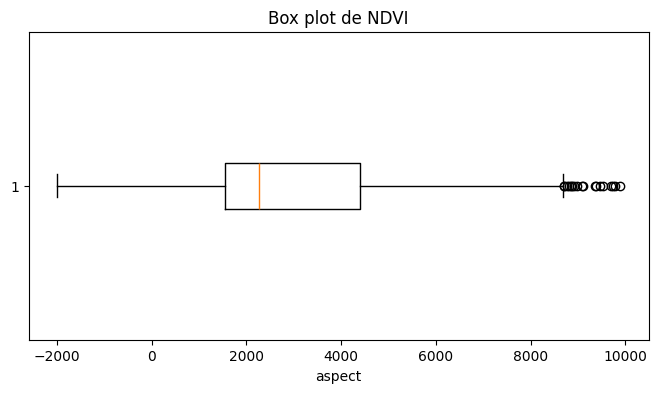

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger ton fichier
gdf = gpd.read_file("/content/drive/MyDrive/data_mining/data_set_fire_perc_log10.gpkg")

# Colonne à analyser
col = "ndvi1"

# ---- Calcul des outliers (méthode IQR) ----
Q1 = gdf[col].quantile(0.25)
Q3 = gdf[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extraction des outliers
outliers = gdf[(gdf[col] < lower_bound) | (gdf[col] > upper_bound)]

# Affichage du résultat
print(f"Nombre d'outliers dans '{col}' : {len(outliers)}")
print(outliers[[col, "geometry"]].head())   # premières lignes des outliers

# ---- Boxplot ----
plt.figure(figsize=(8, 4))
plt.boxplot(gdf[col], vert=False)
plt.title("Box plot de NDVI")
plt.xlabel("aspect")
plt.show()
